# Importing The Important Libraries

In [1]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, log_loss
from sklearn.model_selection import cross_val_score, cross_validate

C:\Users\Robinhood\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Loading the Dataset

In [2]:
bank_note=pd.read_csv("BankNote_Authentication.csv")

# Reading the Dataset

In [3]:
bank_note.head(10)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


# Shape of the Dataset

In [4]:
bank_note.shape

(1372, 5)

# Checking No. of bank notes which are fraud

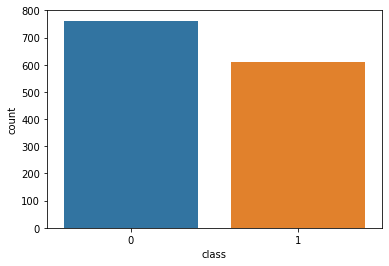

In [5]:
sns.countplot(x="class", data=bank_note)

# Checking the correlation

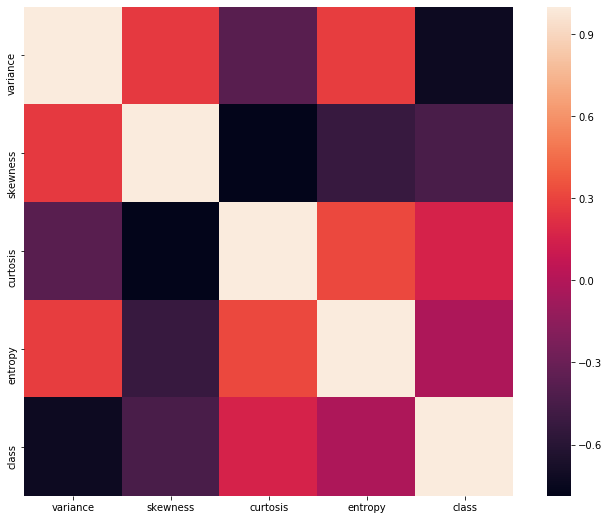

In [6]:
corrmat=bank_note.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,square=True)

In [7]:
bank_note.corr()

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


# Checking if there are any null values

In [8]:
bank_note.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

# Training the Model using Deep learning

In [9]:
X=bank_note.drop("class",axis=1)
y=bank_note["class"]

In [10]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1)

C:\Users\Robinhood\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Building an ANN model with 1 Dense Layer

In [11]:
model=Sequential()
model.add(Dense(4, input_dim=4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


# Training an ANN Model

In [12]:
history=model.fit(X_train, y_train, validation_split=0.1, epochs=100, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 987 samples, validate on 110 samples
Epoch 1/100
987/987 [==============================] - 4s 4ms/step - loss: 1.5261 - acc: 0.4235 - val_loss: 1.1617 - val_acc: 0.4727
Epoch 2/100
987/987 [==============================] - 0s 41us/step - loss: 1.2310 - acc: 0.4103 - val_loss: 0.9330 - val_acc: 0.4545
Epoch 3/100
987/987 [==============================] - 0s 81us/step - loss: 0.9793 - acc: 0.4438 - val_loss: 0.7615 - val_acc: 0.5364
Epoch 4/100
987/987 [==============================] - 0s 97us/step - loss: 0.7893 - acc: 0.5664 - val_loss: 0.6429 - val_acc: 0.6818
Epoch 5/100
987/987 [==============================] - 0s 88us/step - loss: 0.6520 - acc: 0.6626 - val_loss: 0.5615 - val_acc: 0.7182
Epoch 6/100
987/987 [==============================] - 0s 41us/step - loss: 0.5590 - acc: 0.7153 - val_loss: 0.5044 - val_acc: 0.7273
Epoch 7/100
987/987 [==============================] - 0s 41us/step - loss: 0.4927 - acc: 0.7548 - val_

987/987 [==============================] - 0s 41us/step - loss: 0.0484 - acc: 0.9959 - val_loss: 0.0396 - val_acc: 1.0000
Epoch 60/100
987/987 [==============================] - 0s 49us/step - loss: 0.0472 - acc: 0.9959 - val_loss: 0.0379 - val_acc: 1.0000
Epoch 61/100
987/987 [==============================] - 0s 49us/step - loss: 0.0462 - acc: 0.9959 - val_loss: 0.0373 - val_acc: 1.0000
Epoch 62/100
987/987 [==============================] - 0s 49us/step - loss: 0.0452 - acc: 0.9959 - val_loss: 0.0362 - val_acc: 1.0000
Epoch 63/100
987/987 [==============================] - 0s 41us/step - loss: 0.0441 - acc: 0.9959 - val_loss: 0.0352 - val_acc: 1.0000
Epoch 64/100
987/987 [==============================] - 0s 41us/step - loss: 0.0431 - acc: 0.9959 - val_loss: 0.0342 - val_acc: 1.0000
Epoch 65/100
987/987 [==============================] - 0s 49us/step - loss: 0.0422 - acc: 0.9959 - val_loss: 0.0331 - val_acc: 1.0000
Epoch 66/100
987/987 [==============================] - 0s 41us/step

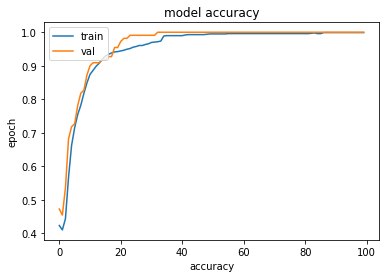

In [13]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

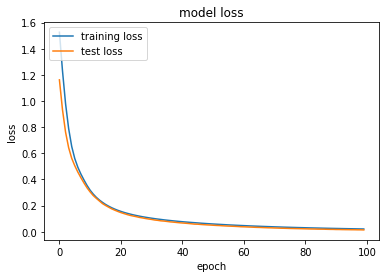

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training loss', 'test loss'], loc='upper left')
plt.show()

# Accuracy of the Dataset

In [15]:
_,accuracy=model.evaluate(X_train, y_train)
print("Accuracy:%.2f"%(accuracy*100))

1097/1097 [==============================] - 0s 22us/step
Accuracy:99.91


# Calculating F-1 score

In [17]:
test_loss=model.evaluate(X_test, y_test, verbose=0)

# Calculate evaluation Parameters
f1=f1_score(y_test, model.predict_classes(X_test), average='micro')

stats=pd.DataFrame({'Test accuracy':
                   round(test_loss[1]*100,3),
                   'F1 Score' : round(f1,3),
                   'Total Loss': round(test_loss[0],3)},
                  index=[0])

display(stats)

,Test accuracy,F1 Score,Total Loss
0,99.273,0.993,0.028
